# Project "Cancer Detection"

## Load the data

#### load the images from 'data' folder 

In [1]:
from PIL import Image
im = Image.open("train/00014e39b5df5f80df56f18a0a049d1cc6de430a.tif")
print(im.size)

(96, 96)


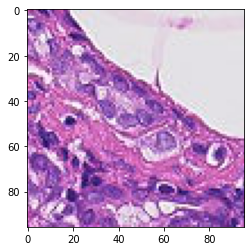

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# convert images to numpy array
a = np.asarray(im)


# visualize the images
imgplot = plt.imshow(a)

------

## Prepare X_train & y_train datasets

In [3]:
import pandas as pd

# load train_labels.csv
csv_df = pd.read_csv('train_labels.csv')
csv_df.head()


# get 100 samples from the data (for initial step)
new_df = csv_df.head(100)
new_df

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0
...,...,...
95,7700d043c8e303d6038daca2586787c4cb7888a8,1
96,03328cbae02c1eaee96fda83ac8712c2f0f4b0e0,0
97,1fb65b2f6a5ab845545d5157a652e4f7a75c53cd,0
98,de9e8f819fa43abd75add518451d709dcb570a4b,0


(100, 96, 96, 3)
(100,)


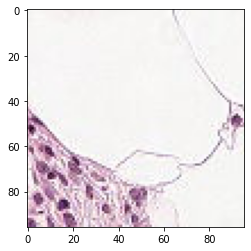

In [16]:
# Save feature(s) X, and target y as a seperate data


# get 100 images in correspondence to target (y)
def get_images(id):
    return np.array(Image.open(f"train/{id}.tif"))  # convert each image to numpy array



# feature (X) 
X = []
for id in new_df['id']:
    X.append(get_images(id))  # get image corresponding to its "id"

X = np.array(X)
    
    
# target (y)
y = new_df['label']


# visualize X    
imgplot = plt.imshow(X[0]) # visualize the feature (X: cancer image)
print(X.shape)
print(y.shape)

In [25]:
# split the data into train & test

from sklearn.model_selection import train_test_split 


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=None)

print(X_train.shape)
print(X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

(70, 96, 96, 3)
(30, 96, 96, 3)
y_train: (70,)
y_test: (30,)


### Label encoding

In [ ]:
# Since we have only two (binary) categories --> No need to convert to categories

print(y_train.value_counts())

---

# Convolutional Neural Network

## Architecture and compilation of a CNN

In [26]:
from tensorflow.keras import layers
from tensorflow.keras import models

def initialize_model():
    model = models.Sequential()

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(96, 96, 3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu'))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(1, activation='sigmoid'))
    
    ### Model compilation
    model.compile(loss='binary_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    return model

model = initialize_model()

2022-09-06 01:37:59.950988: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-06 01:37:59.951047: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-06 01:38:03.075117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-06 01:38:03.075211: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-06 01:38:03.075268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-G1EKDH8): /proc/driver/nvidia/version does not exist
2022-09-06 01:38:03.075820: I tensorflow/core/platform/cpu_fe

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 8)         392       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 16)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                9

---

## Training a CNN

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

# $CHALLENGIFY_BEGIN

model = initialize_model()

es = EarlyStopping(patience = 5)

history = model.fit(X_train, 
                    y_train,
                    validation_split = 0.3,
                    batch_size = 32,
                    epochs = 5,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/5
2/2 [==============================] - 1s 199ms/step - loss: 88.9163 - accuracy: 0.6122 - val_loss: 131.7090 - val_accuracy: 0.2857
Epoch 2/5
2/2 [==============================] - 0s 57ms/step - loss: 97.2235 - accuracy: 0.3265 - val_loss: 0.6930 - val_accuracy: 0.7143
Epoch 3/5
2/2 [==============================] - 0s 57ms/step - loss: 0.6930 - accuracy: 0.6735 - val_loss: 0.6927 - val_accuracy: 0.7143
Epoch 4/5
2/2 [==============================] - 0s 61ms/step - loss: 0.6927 - accuracy: 0.6735 - val_loss: 0.6924 - val_accuracy: 0.7143
Epoch 5/5
2/2 [==============================] - 0s 54ms/step - loss: 0.6925 - accuracy: 0.6735 - val_loss: 0.6921 - val_accuracy: 0.7143


### Evaluate the model performance

In [34]:
res = model.evaluate(X_test, y_test, verbose = 1 )
print(f'The accuracy on the test set is of {res[1]*100:.2f} %')

1/1 [==============================] - 0s 33ms/step - loss: 0.6928 - accuracy: 0.5667
The accuracy on the test set is of 56.67 %
